In [1]:
import sys
sys.path.append('../../')

import numpy as np

from src.mechanism.contest_game import ContestGame
from src.game import Game
from src.strategy import Strategy

from src.learner.frank_wolfe import FrankWolfe
from src.learner.soma import SOMA
from src.learner.soda import SODA

**Setting**
create specific Single Item Auction setting

In [2]:
# parameter mechanism
bidder = ['1', '1']
o_space = {'1':[0.0 ,1.0]}
a_space = {'1':[0.0 ,0.6]}

param_prior = {
    'distribution':'uniform'
    }
param_util = {
    'csf': 'ratio_form_valuation', 
    'param_csf': 1.0
    }

# parameter approximation game
n = 64
m = 64

# create mechanism
mechanism = ContestGame(bidder, o_space, a_space, param_prior, param_util)
# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)

**Learner**
Specify Learning Algorithm

In [6]:
# parameter learner
max_iter = int(1e4)
tol = 1e-4
stop_criterion = 'util_loss'
regularizer = 'euclidean'
steprule_bool = True
eta = 0.05
beta = 1/20

#learner = SODA(max_iter, tol, stop_criterion, regularizer, steprule_bool, eta, beta)
learner = SOMA(max_iter, tol, stop_criterion, regularizer, steprule_bool, eta, beta)
#learner = FrankWolfe(max_iter, tol, stop_criterion)

Run Learning Algorithm

In [7]:
#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')
    
# run soda
learner.run(mechanism, game, strategies, disable_tqdm_bool=False, print_result_bool=True)

 13%|██▌                 | 1.26k/10.0k [00:00<00:06, 1.36kit/s]

Convergence after 1256 iterations
Value of stopping criterion (util_loss) 0.0001


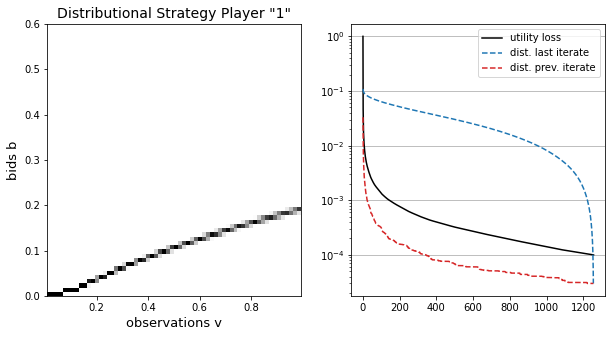

In [9]:
strategies['1'].plot(more=True)